# Units and Uncertainties in SpectroChemPy


In [1]:
from spectrochempy.api import *

Welcome to SpectroChemPy!
matplotlib and numpy namespaces are available under the name 'plt' and 'np' respectively

"Any intelligent fool can make things bigger, more iscomplex, and more violent. It takes a touch of genius - and a lot of courage - to move in the opposite direction."

- Albert Einstein



## Units
Units in SpectroChemPy are based on the `Pint` (library. Quantities with units can be created using the various following syntaxes.

In [2]:
19.4 * ur.cm

19.4 centimeter

In [3]:
19.4 * ur('cm')

19.4 centimeter

In [4]:
quantity(19.4, ur.cm)

19.4 centimeter

In [5]:
quantity(19.4, 'cm')

19.4 centimeter

In [6]:
quantity('19.4 cm')

19.4 centimeter

Conversion between units are easy

In [7]:
a = quantity('19.4 cm')

In [8]:
a.ito(ur.inch) 
a

/Users/christian/Dropbox/PycharmProjects/spectrochempy/spectrochempy/core/utils/decorators.py:59: SpectroChemPyDeprecationWarning: The function `ito is deprecated: use `to` instead
  SpectroChemPyDeprecationWarning)


7.637795275590551 inch

Format strings can be used to format numeric output

In [9]:
b = 1/(a.to('in'))
print('{:.3fK}'.format(b))
print('{:.3fK}'.format(b))  # for compact units
b

0.131 in^-1
0.131 in^-1


0.1309278350515464 1 / inch

Dimensionless units are also handled:

In [10]:
b = a / (1.0 * ur.angstrom)
print('{:.3fK}'.format(b))

7.638 scaled-dimensionless (2.5e+08)


Scaled dimensionless quantity can be made unscaled:

In [11]:
b.to_base_units()

1940000000.0 dimensionless

If an units is not recognized, an error is issued

In [12]:
wrong = 1.0 * ur('cmt')

UndefinedUnitError: 'cmt' is not defined in the unit registry


or if units cannot be converted:

In [13]:
a = quantity('1 liter')
a.to('meters') # wrong conversion (units not compatible)

DimensionalityError: Cannot convert from 'liter' ([length] ** 3) to 'meter' ([length])


In [14]:
x = 10 * ur.meters
np.cos(x) # wrong argument units

DimensionalityError: Cannot convert from 'meter' to 'radian'


Spectroscopic units are silently converted between frequency and wavelength:

In [15]:
a = quantity('1 THz')
a = a.to('micrometer')
a

299.792458 micrometer

In [16]:
a = quantity('1 THz')
a.to('micrometer') 
a

299.792458 micrometer

The corresponding wavenumber is easily obtained

In [17]:
b = 1/a
b.to('cm^-1')
print('{:.3fK}'.format(b))

33.356 cm^-1


Finally, the units can be affected to array structure

In [18]:
c = [3., 4., 5.] * ur.meter
c

[       3        4        5] meter

In [19]:
c.to('km')

[   0.003    0.004    0.005] kilometer

## Uncertainties

In spectrochempy, uncertainties can be used with quantities, this is then a `measurement`.

In [20]:
m = measurement(100.12, .1, ur.cm)
m

(100.12+/-0.10) cm

Numerical output format can be changed

In [21]:
print('{0:ueK}'.format(m))

(1.0012+/-0.0010)e+02 cm


In [22]:
m2 = m * m
m2

(10024.0+/-20.0) cm^2

In [23]:
e = c * m2 
e.to_base_units()

[3.007+/-0.006 4.010+/-0.008 5.012+/-0.010] meter ** 3

## ND-Dataset

Multidimensional array are defined in Spectrochempy using the NDDataset object.

Here is an example, with a 3D-array with axes

In [24]:
dx = np.random.random((10, 100, 3))

axe0 = Axis(coords = np.linspace(4000., 1000., 10),
            labels = 'a b c d e f g h i j'.split(),
            mask = None,
            units = "cm^-1",
            title = 'wavelength')

axe1 = Axis(coords = np.linspace(0., 60., 100),
            labels = None,
            mask = None,
            units = "s",
            title = 'time-on-stream')

axe2 = Axis(coords = np.linspace(200., 300., 3),
            labels = ['cold', 'normal', 'hot'],
            mask = None,
            units = "K",
            title = 'temperature')

da = NDDataset(dx,
                   axes = [axe0, axe1, axe2],
                   title='absorbance',
                   units='dimensionless'
                   )
da.description = """Dataset example created for this tutorial. 
It's a 3-D dataset (with dimensionless intensity)"""

da

NDDataset([[[   0.386,    0.791,  0.00854],
            [   0.114,    0.113,    0.299],
            ..., 
            [   0.219,     0.63,    0.808],
            [   0.347,    0.685,     0.79]],

           [[  0.0558,    0.111,    0.011],
            [   0.797,   0.0273,    0.152],
            ..., 
            [   0.232,    0.372,    0.281],
            [   0.992,    0.604,    0.293]],

           ..., 
           [[    0.86,     0.18,    0.783],
            [   0.776,     0.73,   0.0442],
            ..., 
            [   0.545,    0.886,    0.833],
            [   0.808,      0.5,    0.397]],

           [[   0.692,    0.481,    0.996],
            [   0.348,    0.974,    0.398],
            ..., 
            [   0.786,    0.743,    0.892],
            [   0.548,    0.751,    0.638]]])

NDDataset can be sliced like conventional numpy-array...

In [25]:
das = da[...,0]
das

NDDataset([[[   0.386],
            [   0.114],
            ..., 
            [   0.219],
            [   0.347]],

           [[  0.0558],
            [   0.797],
            ..., 
            [   0.232],
            [   0.992]],

           ..., 
           [[    0.86],
            [   0.776],
            ..., 
            [   0.545],
            [   0.808]],

           [[   0.692],
            [   0.348],
            ..., 
            [   0.786],
            [   0.548]]])

Single-element dimension are kept but can also be squeezed easily:

In [26]:
das = das.squeeze()
das

NDDataset([[   0.386,    0.114, ...,    0.219,    0.347],
           [  0.0558,    0.797, ...,    0.232,    0.992],
           ..., 
           [    0.86,    0.776, ...,    0.545,    0.808],
           [   0.692,    0.348, ...,    0.786,    0.548]])

To plot a dataset, use the view command (generic plot)

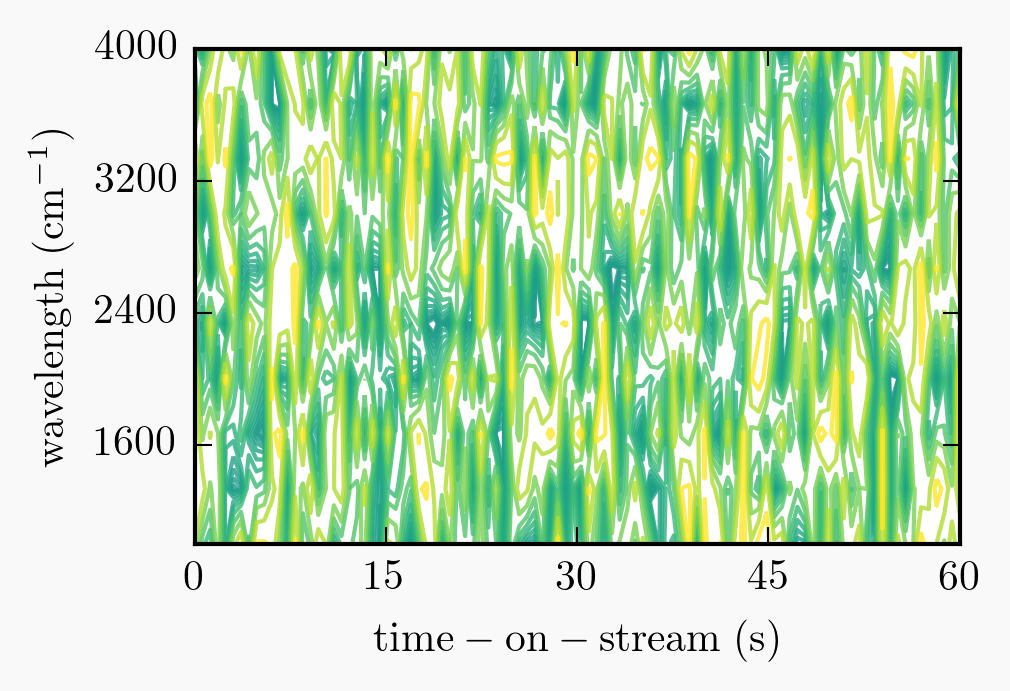

In [27]:
das.view(dpi=100)

Dataset can be transposed

In [28]:
dasT = das.T
dasT

NDDataset([[   0.386,   0.0558, ...,     0.86,    0.692],
           [   0.114,    0.797, ...,    0.776,    0.348],
           ..., 
           [   0.219,    0.232, ...,    0.545,    0.786],
           [   0.347,    0.992, ...,    0.808,    0.548]])

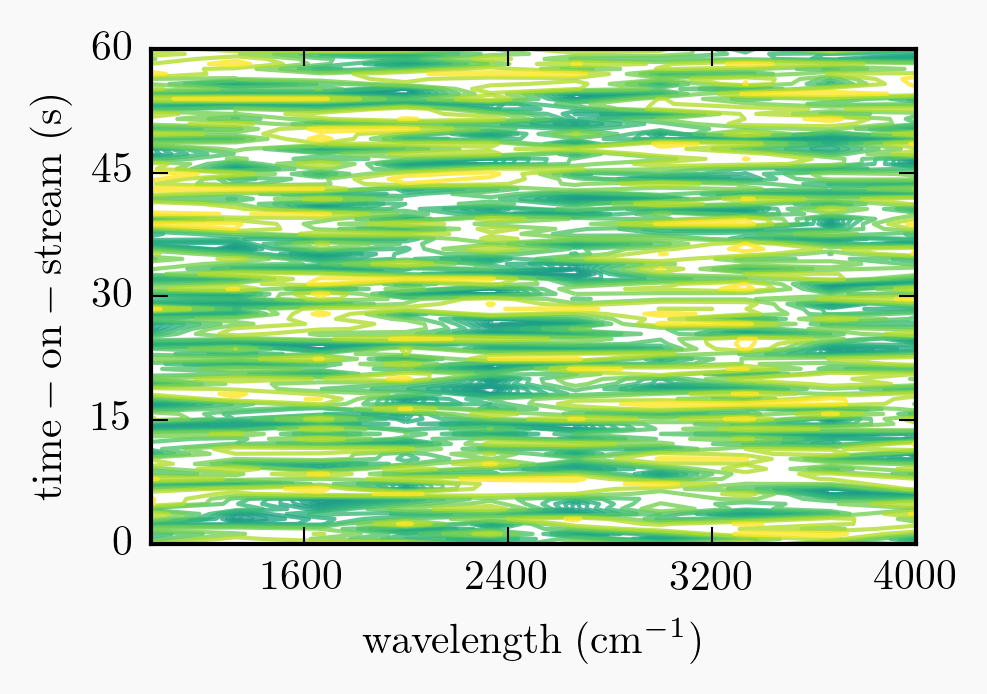

In [29]:
dasT.view()

Now, lets load a NMR dataset (in the Bruker format)

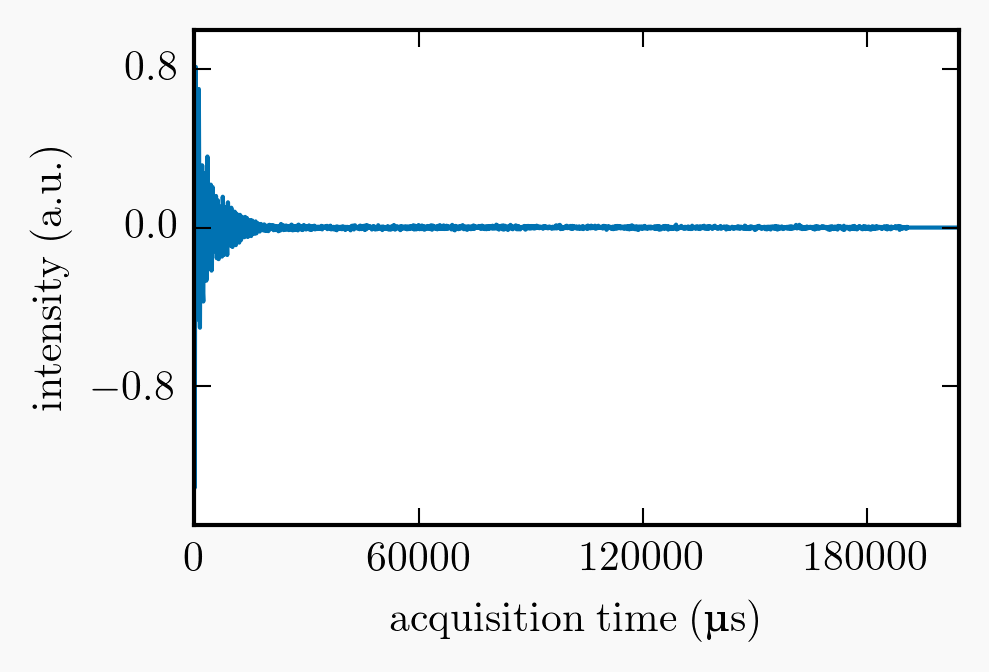

In [30]:
import os

path = os.path.join('..','tests','testdata', 'bruker', 'tests', 'nmr','bruker_1d')

# create an empty dataset 
ndd = NDDataset()

# load the data
ndd.read_bruker(path, expno=1, remove_digital_filter=True)

# view it...
fig1 = ndd.view() 
fig1

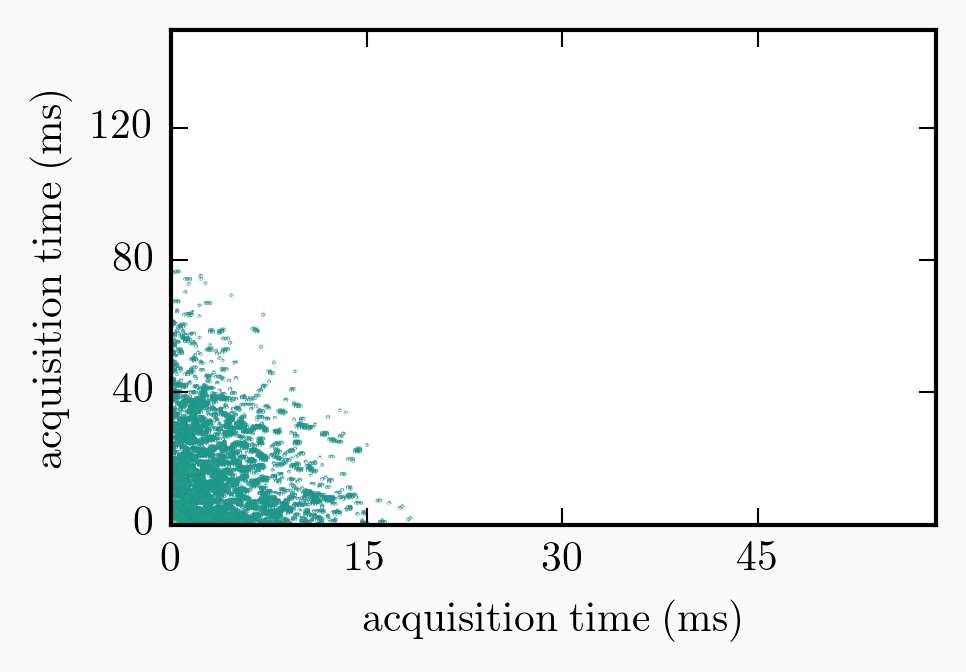

In [31]:
path = os.path.join('..','tests','testdata', 'bruker', 'tests', 'nmr','bruker_2d')

# create an empty dataset 
ndd2 = NDDataset()

# load the data
ndd2.read_bruker(path, expno=1, remove_digital_filter=True)

# view it...
ndd2.x.to('ms')
ndd2.y.to('ms')
fig2 = ndd2.view() 
fig2

To display a list of the currently **available services**, we just need to type

In [32]:
available_services

['Motd',
 'Isotopes',
 'Logger',
 'Axis',
 'NDDataset',
 'Axes',
 'ur',
 'quantity',
 'measurement',
 'set_nmr_context',
 'np',
 'plt']

### Using the API: a first example

If you are interested by **NMR**, it might be useful to have information about NMR isotopes, *e.g.*, to include this in some further calculations.

Let's get information about the $^{27}$Al nucleus. 

We use the **Isotopes** class:

In [33]:
al = Isotopes('27Al')
al

Isotopes < 27Al >

In [34]:
print(al.symbol, al.spin)

Al 5/2


In [35]:
quadrupolar_moment = al.Q.to('m^2') 
quadrupolar_moment

1.466e-29 meter ** 2

In [36]:
gyromagnetic_ratio = al.gamma
gyromagnetic_ratio

11.103076875144868 megahertz / tesla

It is then obvious how to get the Larmor frequency of aluminium:

In [37]:
Bo = quantity('9.4 tesla')
print("{:~.2f} at {:~.2f}".format(al.gamma * Bo, Bo))

104.37 MHz at 9.40 T


In [38]:
np.sin(1)

0.8414709848078965

# The dataset object

In [39]:
print(da)


--------------------------------------------------------------------------------
       author: christian@macbookcf.local
      created: 2016-05-12 23:59:59.722971
last modified: 2016-05-12 23:59:59.730450
  description: Dataset example created for this tutorial.
               It's a 3-D dataset (with dimensionless data such as intensity)
   data title: absorbance
   data shape: 10 x 100 x 3
   data units: dimensionless
  data values:
         [[[   0.386    0.791  0.00854]
           [   0.114    0.113    0.299]
           ..., 
           [   0.219     0.63    0.808]
           [   0.347    0.685     0.79]]
          [[  0.0558    0.111    0.011]
           [   0.797   0.0273    0.152]
           ..., 
           [   0.232    0.372    0.281]
           [   0.992    0.604    0.293]]
          ..., 
          [[    0.86     0.18    0.783]
           [   0.776     0.73   0.0442]
           ..., 
           [   0.545    0.886    0.833]
           [   0.808      0.5    0.397]]
         

In [40]:
da

NDDataset([[[   0.386,    0.791,  0.00854],
            [   0.114,    0.113,    0.299],
            ..., 
            [   0.219,     0.63,    0.808],
            [   0.347,    0.685,     0.79]],

           [[  0.0558,    0.111,    0.011],
            [   0.797,   0.0273,    0.152],
            ..., 
            [   0.232,    0.372,    0.281],
            [   0.992,    0.604,    0.293]],

           ..., 
           [[    0.86,     0.18,    0.783],
            [   0.776,     0.73,   0.0442],
            ..., 
            [   0.545,    0.886,    0.833],
            [   0.808,      0.5,    0.397]],

           [[   0.692,    0.481,    0.996],
            [   0.348,    0.974,    0.398],
            ..., 
            [   0.786,    0.743,    0.892],
            [   0.548,    0.751,    0.638]]])

In [41]:
al.gamma

11.103076875144868 megahertz / tesla

In [42]:
from pint import UnitRegistry
ur = UnitRegistry()

In [43]:
(1 * ur.rps)

1 hertz

In [44]:
1 * ur.rad

1 radian

In [45]:
print(da[4000.])


--------------------------------------------------------------------------------
       author: christian@macbookcf.local
      created: 2016-05-13 00:00:06.317611
last modified: 2016-05-13 00:00:06.317795
  description: Dataset example created for this tutorial.
               It's a 3-D dataset (with dimensionless data such as intensity)
   data title: absorbance
   data shape: 1 x 100 x 3
   data units: dimensionless
  data values:
         [[[   0.386    0.791  0.00854]
           [   0.114    0.113    0.299]
           ..., 
           [   0.219     0.63    0.808]
           [   0.347    0.685     0.79]]]
       axis 0:
               title: Wavelength
         coordinates: [   4e+03]
               units: cm^-1
              labels: [a]
       axis 1:
               title: Time-on-stream
         coordinates: [       0    0.606 ...,     59.4       60]
               units: s
       axis 2:
               title: Temperature
         coordinates: [     200      250      300]
     

In [46]:
da[4000]

IndexError: Empty array of shape (0, 100, 3) resulted from slicing.
Check the indexes and make sure to use floats for location slicing


In [47]:
darange =da[4000., :,  'normal':'hot']
print(darange)


--------------------------------------------------------------------------------
       author: christian@macbookcf.local
      created: 2016-05-13 00:00:06.416188
last modified: 2016-05-13 00:00:06.416343
  description: Dataset example created for this tutorial.
               It's a 3-D dataset (with dimensionless data such as intensity)
   data title: absorbance
   data shape: 1 x 100 x 2
   data units: dimensionless
  data values:
         [[[   0.791  0.00854]
           [   0.113    0.299]
           ..., 
           [    0.63    0.808]
           [   0.685     0.79]]]
       axis 0:
               title: Wavelength
         coordinates: [   4e+03]
               units: cm^-1
              labels: [a]
       axis 1:
               title: Time-on-stream
         coordinates: [       0    0.606 ...,     59.4       60]
               units: s
       axis 2:
               title: Temperature
         coordinates: [     250      300]
               units: K
              labels: [nor

In [48]:
print(da[0,1,2])


--------------------------------------------------------------------------------
       author: christian@macbookcf.local
      created: 2016-05-13 00:00:06.467967
last modified: 2016-05-13 00:00:06.468152
  description: Dataset example created for this tutorial.
               It's a 3-D dataset (with dimensionless data such as intensity)
   data title: absorbance
   data shape: 1 x 1 x 1
   data units: dimensionless
  data values:
         [[[   0.299]]]
       axis 0:
               title: Wavelength
         coordinates: [   4e+03]
               units: cm^-1
              labels: [a]
       axis 1:
               title: Time-on-stream
         coordinates: [   0.606]
               units: s
       axis 2:
               title: Temperature
         coordinates: [     300]
               units: K
              labels: [hot]
--------------------------------------------------------------------------------


In [49]:
from spectrochempy.api import NDDataset
ndd = NDDataset([1., 2., 3.])
print(ndd)


--------------------------------------------------------------------------------
       author: christian@macbookcf.local
      created: 2016-05-13 00:00:06.513560
last modified: 2016-05-13 00:00:06.513595
  description: 
   data title: 
    data size: 3
   data units: unitless
  data values:
         [       1        2        3]
--------------------------------------------------------------------------------


In [50]:
print(np.sqrt(ndd))


--------------------------------------------------------------------------------
       author: christian@macbookcf.local
      created: 2016-05-13 00:00:06.564523
last modified: 2016-05-13 00:00:06.564594
  description: 
   data title: 
    data size: 3
   data units: unitless
  data values:
         [       1     1.41     1.73]
--------------------------------------------------------------------------------


In [51]:
dx = [0, 1, 2, 3]   # a simple list
da = NDDataset(dx)
da.title = 'intensity'
da.description = 'Some experimental measurements'
print(da)


--------------------------------------------------------------------------------
       author: christian@macbookcf.local
      created: 2016-05-13 00:00:06.615261
last modified: 2016-05-13 00:00:06.615525
  description: Some experimental measurements
   data title: intensity
    data size: 4
   data units: unitless
  data values:
         [       0        1        2        3]
--------------------------------------------------------------------------------


In [52]:
da.title = 'intensity '
da.description = 'Some experimental measurements'
print(da)


--------------------------------------------------------------------------------
       author: christian@macbookcf.local
      created: 2016-05-13 00:00:06.615261
last modified: 2016-05-13 00:00:06.662779
  description: Some experimental measurements
   data title: intensity 
    data size: 4
   data units: unitless
  data values:
         [       0        1        2        3]
--------------------------------------------------------------------------------


In [53]:
da.title = 'intensity '
da.description = 'Some experimental measurements'
da.units = 'dimensionless'
print(da)


--------------------------------------------------------------------------------
       author: christian@macbookcf.local
      created: 2016-05-13 00:00:06.615261
last modified: 2016-05-13 00:00:06.713637
  description: Some experimental measurements
   data title: intensity 
    data size: 4
   data units: dimensionless
  data values:
         [       0        1        2        3]
--------------------------------------------------------------------------------


In [54]:
print(da)


--------------------------------------------------------------------------------
       author: christian@macbookcf.local
      created: 2016-05-13 00:00:06.615261
last modified: 2016-05-13 00:00:06.713637
  description: Some experimental measurements
   data title: intensity 
    data size: 4
   data units: dimensionless
  data values:
         [       0        1        2        3]
--------------------------------------------------------------------------------


In [55]:
db = NDDataset(da, units='mol/g', title='concentration')
print(db)


--------------------------------------------------------------------------------
       author: christian@macbookcf.local
      created: 2016-05-13 00:00:06.813291
last modified: 2016-05-13 00:00:06.813955
  description: 
   data title: concentration
    data size: 4
   data units: mol.g^-1
  data values:
         [       0        1        2        3]
--------------------------------------------------------------------------------


In [56]:
nd = NDDataset([  [1.+2.j, 2.+0j], [1.3+2.j, 2.+0.5j],
                  [1.+4.2j, 2.+3j], [5.+4.2j, 2.+3j ] ])
assert nd.data.size == 16
assert nd.size == 8
assert nd.data.shape == (4, 4)
assert nd.shape == (4, 2)

nd._is_complex[0] = True

In [57]:
print(nd)


--------------------------------------------------------------------------------
       author: christian@macbookcf.local
      created: 2016-05-13 00:00:06.865732
last modified: 2016-05-13 00:00:06.865972
  description: 
   data title: 
   data shape: 2(complex) x 2(complex)
   data units: unitless
  data values:
         [[       1        2        2        0]
          [     1.3        2        2      0.5]
          [       1      4.2        2        3]
          [       5      4.2        2        3]]
--------------------------------------------------------------------------------


In [58]:
print(nd.real(axis=1))


--------------------------------------------------------------------------------
       author: christian@macbookcf.local
      created: 2016-05-13 00:00:06.963157
last modified: 2016-05-13 00:00:06.963262
  description: 
   data title: 
   data shape: 2(complex) x 2
   data units: unitless
  data values:
         [[       1        2]
          [     1.3        2]
          [       1        2]
          [       5        2]]
--------------------------------------------------------------------------------


In [59]:
nd

NDDataset([[       1,        2,        2,        0],
           [     1.3,        2,        2,      0.5],
           [       1,      4.2,        2,        3],
           [       5,      4.2,        2,        3]])

In [60]:
nd.real(0)

NDDataset([[       1,        2,        2,        0],
           [       1,      4.2,        2,        3]])

In [61]:
nd.imag(0)

NDDataset([[     1.3,        2,        2,      0.5],
           [       5,      4.2,        2,        3]])

In [62]:
nd

NDDataset([[       1,        2,        2,        0],
           [     1.3,        2,        2,      0.5],
           [       1,      4.2,        2,        3],
           [       5,      4.2,        2,        3]])

In [63]:
nd.T

In [64]:
nd.transpose(1,0)

ValueError: axes don't match array


In [65]:
nd = NDDataset()
nd._data = np.random.random((10, 10))
nd.set_complex(axis=-1)    # this means that the data are complex in
nd.shape

TypeError: 'NoneType' object does not support item assignment


In [66]:
nd.shape

(10, 10)

In [67]:
dx = np.random.random((10, 100, 3))

axe0 = Axis(coords = np.linspace(4000., 1000., 10),
            labels = 'a b c d e f g h i j'.split(),
            mask = None,
            units = "cm^-1",
            title = 'wavelength')

axe1 = Axis(coords = np.linspace(0., 60., 100),
            labels = None,
            mask = None,
            units = "s",
            title = 'time-on-stream')

axe2 = Axis(coords = np.linspace(200., 300., 3),
            labels = ['cold', 'normal', 'hot'],
            mask = None,
            units = "K",
            title = 'temperature')

da = NDDataset(dx,
                   axes = [axe0, axe1, axe2],
                   title='absorbance',
                   units='dimensionless'
                   )
print(da)


--------------------------------------------------------------------------------
       author: christian@macbookcf.local
      created: 2016-05-13 00:00:07.420971
last modified: 2016-05-13 00:00:07.421323
  description: 
   data title: absorbance
   data shape: 10 x 100 x 3
   data units: dimensionless
  data values:
         [[[   0.744   0.0799    0.866]
           [   0.624    0.585    0.377]
           ..., 
           [    0.57    0.371    0.236]
           [   0.269    0.979    0.803]]
          [[   0.308    0.317     0.35]
           [ 0.00978    0.508    0.117]
           ..., 
           [   0.104   0.0786      0.5]
           [   0.126    0.943    0.678]]
          ..., 
          [[   0.331    0.529     0.58]
           [   0.263    0.847     0.59]
           ..., 
           [   0.743    0.341  0.00103]
           [   0.737    0.164   0.0021]]
          [[   0.737    0.524    0.432]
           [   0.774    0.426    0.823]
           ..., 
           [   0.545    0.684   

In [68]:
da.set_complex(axis=1)
da.set_complex(axis=0)
print(da)


--------------------------------------------------------------------------------
       author: christian@macbookcf.local
      created: 2016-05-13 00:00:07.420971
last modified: 2016-05-13 00:00:07.464287
  description: 
   data title: absorbance
   data shape: 5(complex) x 50(complex) x 3
   data units: dimensionless
  data values:
         [[[   0.744   0.0799    0.866]
           [   0.624    0.585    0.377]
           ..., 
           [    0.57    0.371    0.236]
           [   0.269    0.979    0.803]]
          [[   0.308    0.317     0.35]
           [ 0.00978    0.508    0.117]
           ..., 
           [   0.104   0.0786      0.5]
           [   0.126    0.943    0.678]]
          ..., 
          [[   0.331    0.529     0.58]
           [   0.263    0.847     0.59]
           ..., 
           [   0.743    0.341  0.00103]
           [   0.737    0.164   0.0021]]
          [[   0.737    0.524    0.432]
           [   0.774    0.426    0.823]
           ..., 
           [   0

In [69]:
db = da.swapaxes(2, 0)
print(db)


--------------------------------------------------------------------------------
       author: christian@macbookcf.local
      created: 2016-05-13 00:00:07.514156
last modified: 2016-05-13 00:00:07.514664
  description: 
   data title: absorbance
   data shape: 3 x 50(complex) x 5(complex)
   data units: dimensionless
  data values:
         [[[   0.744    0.308 ...,    0.331    0.737]
           [   0.624  0.00978 ...,    0.263    0.774]
           ..., 
           [    0.57    0.104 ...,    0.743    0.545]
           [   0.269    0.126 ...,    0.737    0.365]]
          [[  0.0799    0.317 ...,    0.529    0.524]
           [   0.585    0.508 ...,    0.847    0.426]
           ..., 
           [   0.371   0.0786 ...,    0.341    0.684]
           [   0.979    0.943 ...,    0.164    0.567]]
          [[   0.866     0.35 ...,     0.58    0.432]
           [   0.377    0.117 ...,     0.59    0.823]
           ..., 
           [   0.236      0.5 ...,  0.00103    0.801]
           [   0

In [70]:
print(db.axes)

([temperature], [time-on-stream], [wavelength])


In [71]:
print(db.T)


--------------------------------------------------------------------------------
       author: christian@macbookcf.local
      created: 2016-05-13 00:00:07.613895
last modified: 2016-05-13 00:00:07.613951
  description: 
   data title: absorbance
   data shape: 5(complex) x 50(complex) x 3
   data units: dimensionless
  data values:
         [[[   0.744   0.0799    0.866]
           [   0.624    0.585    0.377]
           ..., 
           [    0.57    0.371    0.236]
           [   0.269    0.979    0.803]]
          [[   0.308    0.317     0.35]
           [ 0.00978    0.508    0.117]
           ..., 
           [   0.104   0.0786      0.5]
           [   0.126    0.943    0.678]]
          ..., 
          [[   0.331    0.529     0.58]
           [   0.263    0.847     0.59]
           ..., 
           [   0.743    0.341  0.00103]
           [   0.737    0.164   0.0021]]
          [[   0.737    0.524    0.432]
           [   0.774    0.426    0.823]
           ..., 
           [   0

In [72]:
db.axes

Axes object <<Axis object e3a57928>, <Axis object e3a56df4>, <Axis object e3a56228>>

In [73]:
db.axes._axes.reverse()
db.axes._axes

[Axis([   4e+03, 3.33e+03, 2.67e+03,    2e+03, 1.33e+03]) cm^-1,
 Axis([       0,     1.21, ...,     58.2,     59.4]) s,
 Axis([     200,      250,      300]) K]

In [74]:
Application

NameError: name 'Application' is not defined


In [75]:
quantity('10. cm')

10.0 centimeter

In [76]:
10. * units.cm

NameError: name 'units' is not defined


In [77]:
measurement(10,1,'km')

(10.0+/-1.0) km

In [78]:
%precision 2

'%.2f'

In [79]:
quantity("900 km / (8 hours)")

112.5 kilometer / hour

In [80]:
a = np.arange(20)
a[slice(2, 3, None)].squeeze(), a[2]

(array(2), 2)

In [81]:
a

array([ 0,  1, ..., 18, 19])

In [82]:
a < a*2

array([False,  True, ...,  True,  True], dtype=bool)

In [99]:
from IPython.display import display, Latex
Latex(r"${:Lx}$".format(quantity(1. , ur.us)))

<IPython.core.display.Latex object>

In [84]:
from spectrochempy.api import *

In [85]:
path = "/Users/christian/Dropbox/PycharmProjects/spectrochempy/tests/testdata/bruker/tests/nmr/bruker_1d"
ndd = NDDataset()
ndd.read_bruker(path, expno=1, remove_digital_filter=False)

fig1 = ndd.view(savefig='essai')
fig2 = ndd.view()

In [86]:
ndd2 = ndd.copy()

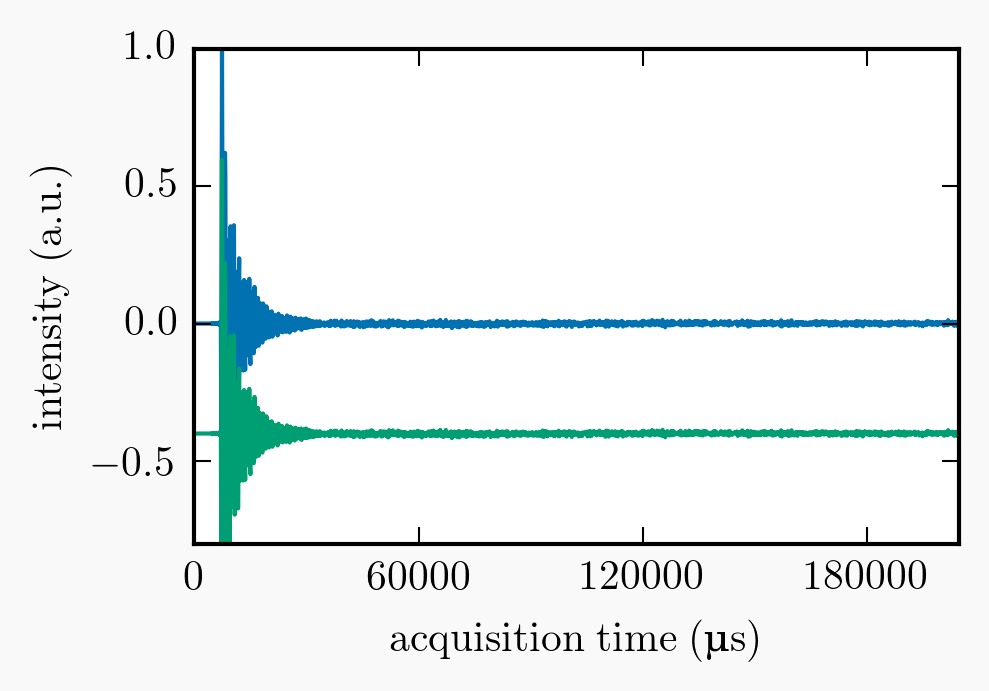

In [87]:
ndd2.view(fig=fig1, offset=.4)

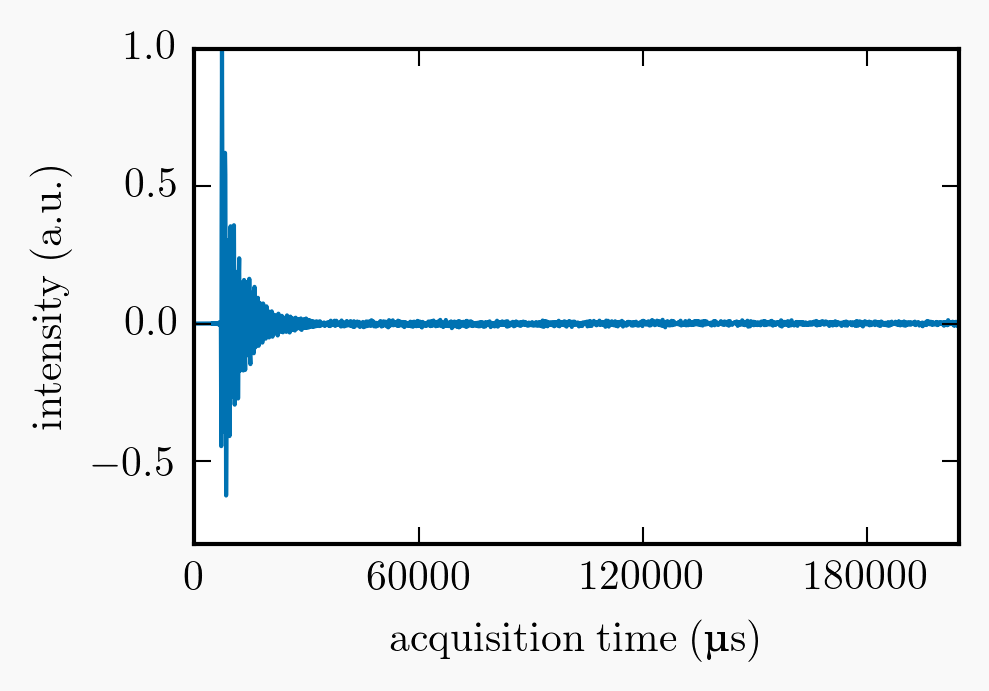

In [88]:
fig = ndd2.view(savefig='essai')
fig

In [89]:
ndd2.view(fig=2, offset=-.6,)
plt.show()

In [90]:
import matplotlib as mpl
print(mpl.rcParams)
mpl.rcParams['axes.formatter.unicode_minus']

KeyError: 'axes.formatter.unicode_minus'


agg.path.chunksize: 0
animation.avconv_args: []
animation.avconv_path: avconv
animation.bitrate: -1
animation.codec: mpeg4
animation.convert_args: []
animation.convert_path: convert
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.mencoder_args: []
animation.mencoder_path: mencoder
animation.writer: ffmpeg
axes.axisbelow: False
axes.edgecolor: black
axes.facecolor: white
axes.formatter.limits: [-7, 7]
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: False
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.hold: True
axes.labelcolor: black
axes.labelpad: 5.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 1.0
axes.prop_cycle: cycler('color', ['#0072B2', '#009E73', '#D55E00', '#CC79A7', '#F0E442', '#56B4E9'])
axes.spines.bottom: True
axes.spines.left: True
axes.spines.right: True
axes.spines.top: True
axes.titlesize: large
axes.titleweight: normal


In [91]:
axe0

title,Wavelength
coordinates,"[ 4000. 3666.67 ..., 1333.33 1000. ]"
units,cm-1
labels,"['a' 'b' ..., 'i' 'j']"


In [92]:
x = np.linspace(0,100.,100)
w = x[-1]-x[0]
f = lambda x, off=x[0], end=x[-1], pow=1 : np.sin(np.pi*off/w + np.pi*(end - off)*x /w/(x.size-1))

In [93]:
w

100.00

In [94]:
plt.plot(x, f(x,50,100.))
plt.show()

In [95]:
i = np.arange(100)
size = len(i)
g = lambda i, off=0, end=1, pow=1: np.sin( np.pi*off + np.pi*(end-off)*i/(size-1) )**pow

In [96]:
plt.plot(i,g(i, 0.5, 1))
plt.show()